In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import NearMiss
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score,mean_absolute_error,accuracy_score,mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest, f_classif
import gradio as gr
import warnings
warnings.filterwarnings("ignore")

# Load Data

In [4]:
df=pd.read_excel('Heart Disease.xlsx')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


In [5]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [6]:
df.duplicated().sum()

18078

In [7]:
df.drop_duplicates(inplace=True)

# Data preprocessing

In [12]:
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

In [13]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3,30,0,0,7,5,2,1,4,5,1,0,1
1,0,20.34,0,0,1,0,0,0,0,12,5,0,1,4,7,0,0,0
2,0,26.58,1,0,0,20,30,0,1,9,5,2,1,1,8,1,0,0
3,0,24.21,0,0,0,0,0,0,0,11,5,0,0,2,6,0,0,1
4,0,23.71,0,0,0,28,0,1,0,4,5,0,1,4,8,0,0,0


In [14]:
df['HeartDisease'].value_counts()

HeartDisease
0    274456
1     27261
Name: count, dtype: int64

In [15]:
x = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']

# Undersampling

In [16]:
nm = NearMiss()
new_x , new_y = nm.fit_resample(x,y)

In [17]:
new_y.value_counts()

HeartDisease
0    27261
1    27261
Name: count, dtype: int64

# Feature Selection

In [20]:
kbest = SelectKBest(score_func=f_classif)
scores = kbest.fit(new_x, new_y)
scores.scores_

array([ 3353.23189663,  1357.17429369,   369.14765415,  4423.20392692,
       12410.23665574,  6951.13725071, 12366.15468651,   115.10118706,
          25.76296762,  4346.58004878,  7545.82190506,  6708.36019377,
        1163.59651556,   303.65591274,  3988.82481558,  3379.40136694,
         395.38074765])

In [21]:
col1 = pd.DataFrame(new_x.columns, columns=['Feature Names'])
col2 = pd.DataFrame(scores.scores_, columns=['Feature Score'])
scores = pd.concat([col1,col2],axis=1)
scores.head()

,Feature Names,Feature Score
0,BMI,3353.231897
1,Smoking,1357.174294
2,AlcoholDrinking,369.147654
3,Stroke,4423.203927
4,PhysicalHealth,12410.236656


<Axes: xlabel='Feature Names'>

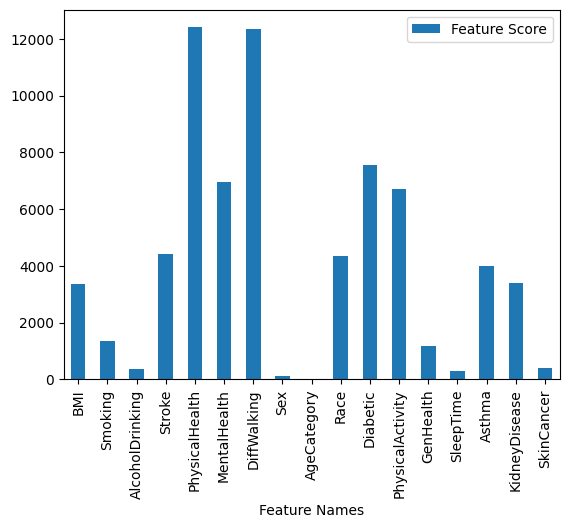

In [22]:
scores.plot(x='Feature Names', y='Feature Score', kind='bar')

# Train Test Splitting

In [23]:
xtrain,xtest,ytrain,ytest=tts(new_x,new_y,train_size=0.3,random_state=42)

In [24]:
def model(model):
    model.fit(xtrain, ytrain)
    y_pred = model.predict(xtest)
    r2 = r2_score(ytest, y_pred)
    mse = mean_squared_error(ytest, y_pred)
    mae = mean_absolute_error(ytest, y_pred)
    acc = model.score(xtest, ytest)
    print(str(model)+ ' --> ' +str(acc))
    print(f"R2 Score: {r2:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"MAE: {mae:.4f}")
    return acc

In [25]:
lr = LogisticRegression()
lr_acc = model(lr)

dt = DecisionTreeClassifier()
dt_acc = model(dt)

rf = RandomForestClassifier()
rf_acc = model(rf)

knn =KNeighborsClassifier(n_neighbors= 50)
knn_acc = model(knn)

svm = SVC(kernel='linear')
svm_acc = model(svm)

LogisticRegression() --> 0.8562594979824976
R2 Score: 0.4250
MSE: 0.1437
MAE: 0.1437
DecisionTreeClassifier() --> 0.8044332652098727
R2 Score: 0.2177
MSE: 0.1956
MAE: 0.1956
RandomForestClassifier() --> 0.8391500288214642
R2 Score: 0.3566
MSE: 0.1608
MAE: 0.1608
KNeighborsClassifier(n_neighbors=50) --> 0.8117958392286329
R2 Score: 0.2472
MSE: 0.1882
MAE: 0.1882
SVC(kernel='linear') --> 0.8442854897028769
R2 Score: 0.3771
MSE: 0.1557
MAE: 0.1557


<Axes: xlabel='Classifier', ylabel='Accuracy'>

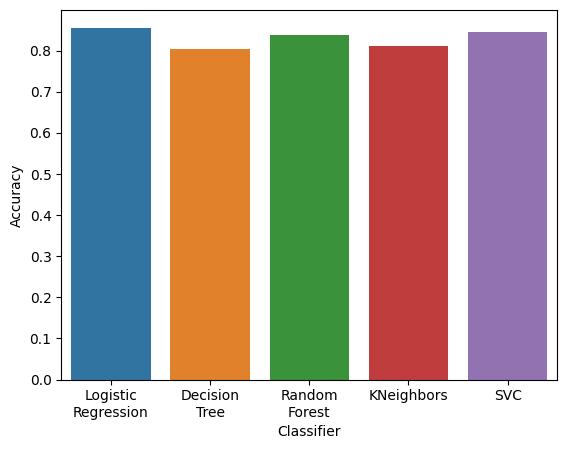

In [27]:
data = {
    'Classifier': ['Logistic\nRegression', 'Decision\nTree', 'Random\nForest', 'KNeighbors', 'SVC'],
    'Accuracy': [lr_acc, dt_acc, rf_acc, knn_acc, svm_acc]
}
data = pd.DataFrame(data=data)
sns.barplot(x='Classifier',y='Accuracy',data=data)

### So the Logistic Regression model gives the most accurate prediction.

# Gradio Deployment

In [33]:
def heart(BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer):
    HeartDisease = lr.predict([[BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer]])
    return HeartDisease

interface = gr.Interface(
  fn = heart, 
  inputs = ['number','number','number','number','number','number','number','number','number',
            'number','number','number','number','number','number','number','number'],
  outputs = ['text']
).launch(share=True)

Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://a61a41b605af7f733b.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
